# I. Initial Setup

In [121]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 1.1 MB/s eta 0:00:0000:0100:01m


In [119]:
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 564.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 572.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 583.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 314.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 1.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 2.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.1 MB/s eta 0:00:0000:0100:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730984 sha256=b901c7e607bdc04249a79647860265beba5d12cc14fa9fc0415995c78c603d11
  Stored in directory: /Users/artefact/Library/Caches/pip/wheels/33/3d/82/4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
Successfully built pymeeus
  Attempting uninstall: nu

In [122]:
import plotly
from prophet import Prophet

In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas_profiling as pp
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [88]:
train = pd.read_csv('train.csv')
train['is_train'] = 1
train.tail()

,date,store,item,sales,is_train
912995,2017-12-27,10,50,63,1
912996,2017-12-28,10,50,59,1
912997,2017-12-29,10,50,74,1
912998,2017-12-30,10,50,62,1
912999,2017-12-31,10,50,82,1


In [89]:
datetime.strptime(train['date'][10086], '%Y-%m-%d')

datetime.datetime(2015, 8, 15, 0, 0)

In [90]:
train.describe()

,store,item,sales,is_train
count,913000.000000,913000.000000,913000.000000,913000.0
mean,5.500000,25.500000,52.250287,1.0
std,2.872283,14.430878,28.801144,0.0
min,1.000000,1.000000,0.000000,1.0
25%,3.000000,13.000000,30.000000,1.0
50%,5.500000,25.500000,47.000000,1.0
75%,8.000000,38.000000,70.000000,1.0
max,10.000000,50.000000,231.000000,1.0


In [91]:
train.dtypes

date        object
store        int64
item         int64
sales        int64
is_train     int64
dtype: object

In [165]:
train[(train['store'] == 1) & (train['item'] == 1)].date.min()

'2013-01-01'

In [166]:
train[(train['store'] == 1) & (train['item'] == 1)].date.max()

'2017-12-31'

In [167]:
len(train[(train['store'] == 1) & (train['item'] == 1)])

1826

In [92]:
test = pd.read_csv('test.csv').drop('id',axis = 1)
test['sales'] = 0
test['is_train'] = 0
test.tail()

,date,store,item,sales,is_train
44995,2018-03-27,10,50,0,0
44996,2018-03-28,10,50,0,0
44997,2018-03-29,10,50,0,0
44998,2018-03-30,10,50,0,0
44999,2018-03-31,10,50,0,0


In [162]:
test[(test['store'] == 1) & (test['item'] == 1)].date.min()

'2018-01-01'

In [163]:
test[(test['store'] == 1) & (test['item'] == 1)].date.max()

'2018-03-31'

In [164]:
len(test[(test['store'] == 1) & (test['item'] == 1)])

90

### Target: use 1826 days of data to generate model and predict item sales for given store in 90 days interval

In [93]:
data = train.append(test).reset_index(drop = True)
data.tail()

,date,store,item,sales,is_train
957995,2018-03-27,10,50,0,0
957996,2018-03-28,10,50,0,0
957997,2018-03-29,10,50,0,0
957998,2018-03-30,10,50,0,0
957999,2018-03-31,10,50,0,0


In [94]:
data['year'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
data['month'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
data['day'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)
data['weekday'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%A'))
data.tail()

,date,store,item,sales,is_train,year,month,day,weekday
957995,2018-03-27,10,50,0,0,2018,3,27,Tuesday
957996,2018-03-28,10,50,0,0,2018,3,28,Wednesday
957997,2018-03-29,10,50,0,0,2018,3,29,Thursday
957998,2018-03-30,10,50,0,0,2018,3,30,Friday
957999,2018-03-31,10,50,0,0,2018,3,31,Saturday


In [96]:
data.weekday.unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

# II. EDA

## 2.1 不同店铺和单品

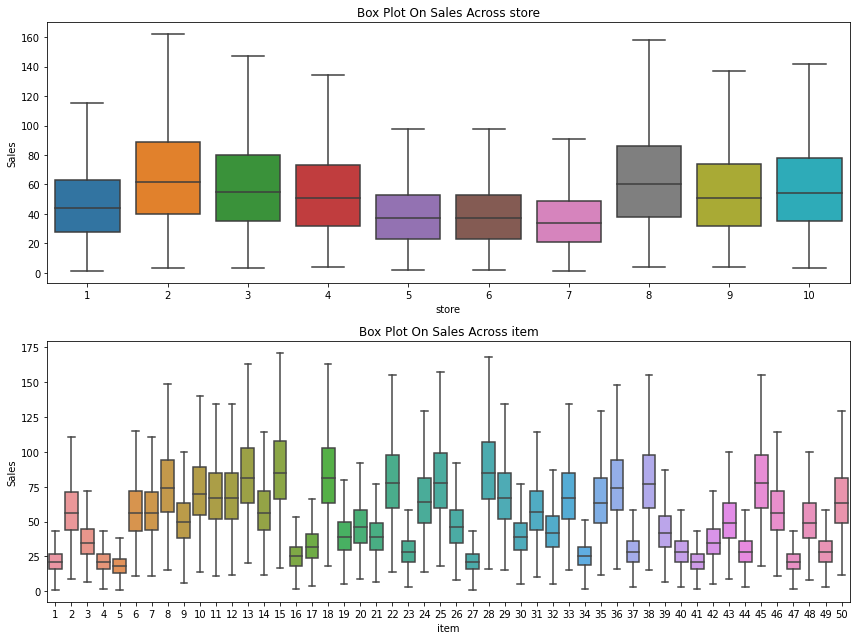

In [134]:
import seaborn as sn
fig, (ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(12, 9)

data_for_viz = data[data['sales'] > 0]

sn.boxplot(data=data_for_viz,y="sales",x="store",orient="v",ax=ax1,showfliers = False)
sn.boxplot(data=data_for_viz,y="sales",x="item",orient="v",ax=ax2,showfliers = False)


ax1.set(xlabel='store', ylabel='Sales',title="Box Plot On Sales Across store")
ax2.set(xlabel='item', ylabel='Sales',title="Box Plot On Sales Across item")

plt.tight_layout() # https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots

plt.show() # 结尾加上该行代码，否则会出现text和array

大致了解到，不同店铺不同单品，其销量表现会略有不同，由于cardinality较高，暂时不作cross 分析。

## 2.2 不同时间

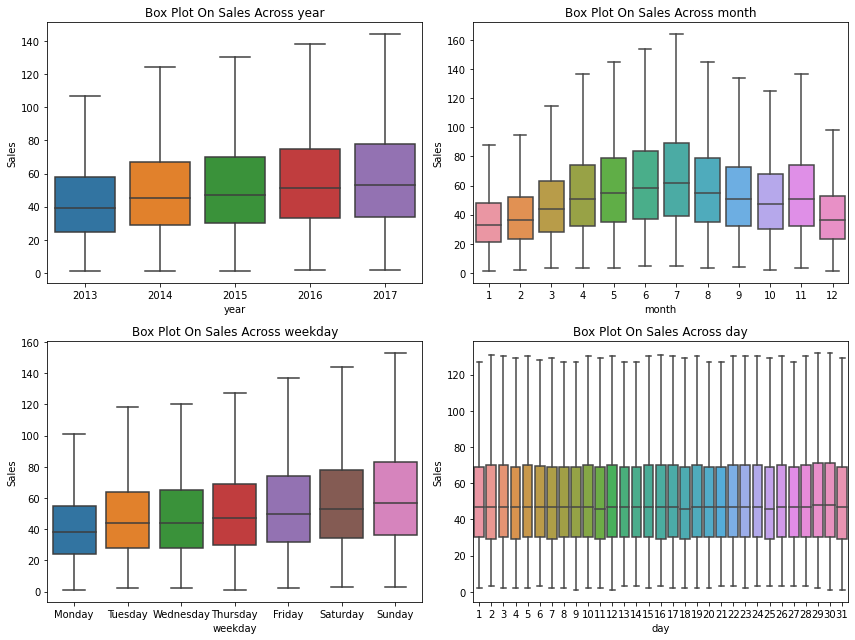

In [113]:
import seaborn as sn
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 9)

data_for_viz = data[data['sales'] > 0]

sn.boxplot(data=data_for_viz,y="sales",x="year",orient="v",ax=axes[0][0],showfliers = False)
sn.boxplot(data=data_for_viz,y="sales",x="month",orient="v",ax=axes[0][1],showfliers = False)
sn.boxplot(data=data_for_viz,y="sales",x="weekday",orient="v",ax=axes[1][0],showfliers = False
           ,order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
sn.boxplot(data=data_for_viz,y="sales",x='day',orient="v",ax=axes[1][1],showfliers = False)

axes[0][0].set(xlabel='year', ylabel='Sales',title="Box Plot On Sales Across year")
axes[0][1].set(xlabel='month', ylabel='Sales',title="Box Plot On Sales Across month")
axes[1][0].set(xlabel='weekday', ylabel='Sales',title="Box Plot On Sales Across weekday")
axes[1][1].set(xlabel='day', ylabel='Sales',title="Box Plot On Sales Across day")

plt.tight_layout() # https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots

plt.show() # 结尾加上该行代码，否则会出现text和array

## 2.3 时间方面的发现

### 随着年份推移，sales稳步上升。

### 按月份推移，从1月起稳步上升，至7月达到顶点随后下降，直至11月突然又有一个小高峰，再下滑至12月。

### 销量从周一到周日总体呈上升趋势,但是周二和周三差别不是很明显。

### 具体“日期处于该月中的第几日”变化幅度不大。


### 下一步 cross analyze 以下组合:

- Year cross month

- Month cross weekday

- Year cross weekday

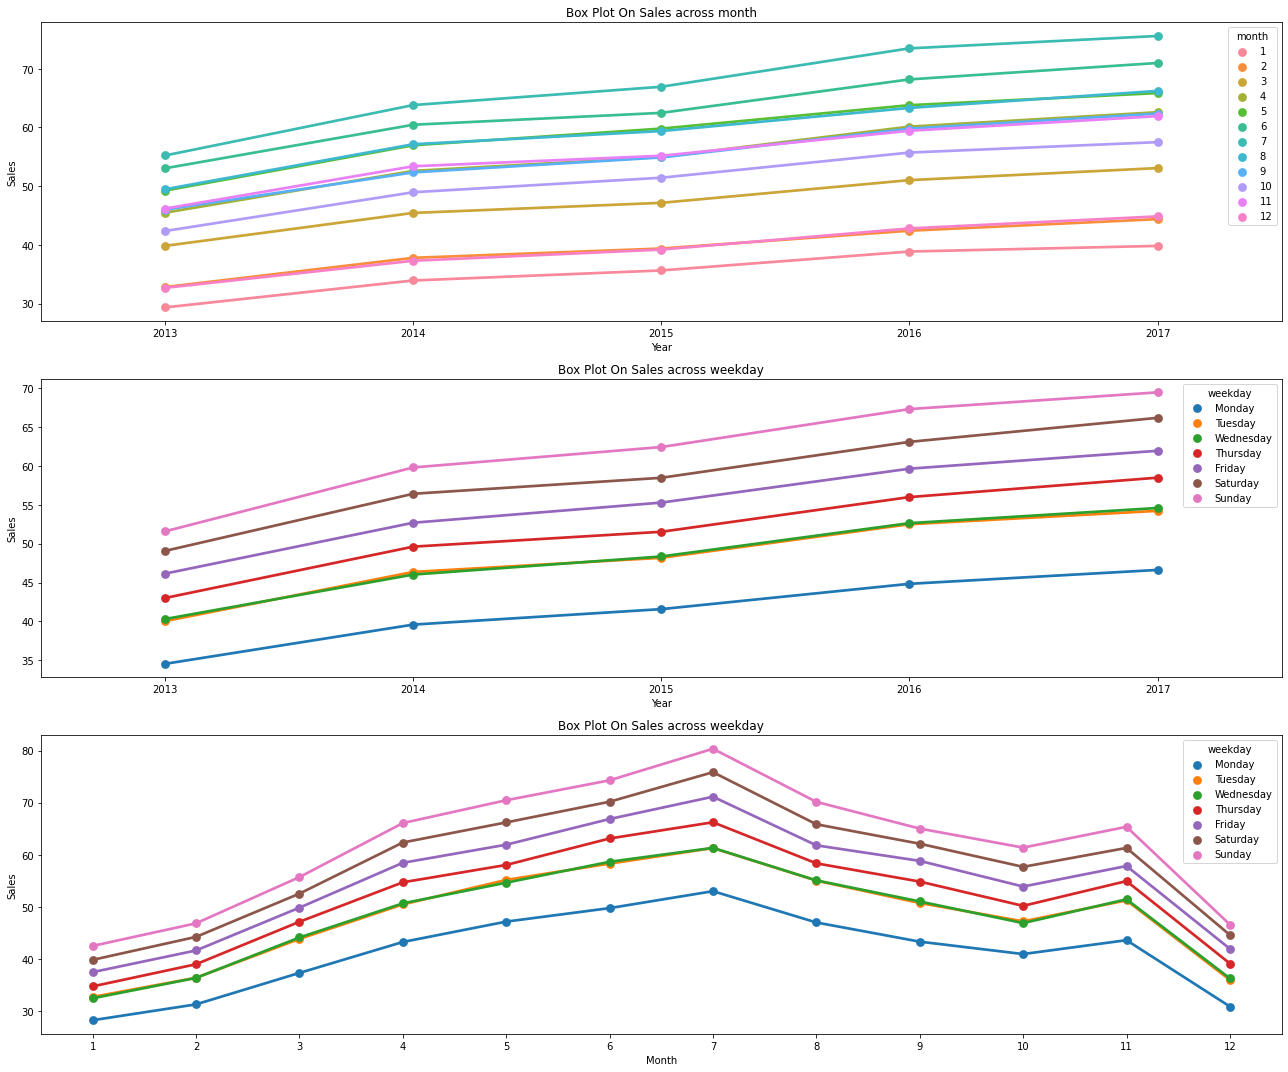

In [116]:
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)
fig.set_size_inches(18, 15)

data_for_viz = data[data['sales'] > 0]

# sales over year / month
groupby_data = pd.DataFrame(data_for_viz.groupby(['year','month'])["sales"].mean()).reset_index()

sn.pointplot(x=groupby_data['year'],
           y=groupby_data['sales'],
           hue = groupby_data['month'],
           ax = ax1)

ax1.set(xlabel = 'Year',ylabel='Sales', title="Box Plot On Sales across month")

# sales over year / month
groupby_data = pd.DataFrame(data_for_viz.groupby(['year','weekday'])["sales"].mean()).reset_index()

sn.pointplot(x=groupby_data['year'],
           y=groupby_data['sales'],
           hue = groupby_data['weekday'],
           hue_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'],
           ax = ax2)

ax2.set(xlabel = 'Year',ylabel='Sales', title="Box Plot On Sales across weekday")

# sales over month / weekday
groupby_data = pd.DataFrame(data_for_viz.groupby(['month','weekday'])["sales"].mean()).reset_index()

sn.pointplot(x=groupby_data['month'],
           y=groupby_data['sales'],
           hue = groupby_data['weekday'],
           hue_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'],
           ax = ax3)

ax3.set(xlabel = 'Month',ylabel='Sales', title="Box Plot On Sales across weekday")

plt.tight_layout() # https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots

plt.show() # 结尾加上该行代码，否则会出现text和array

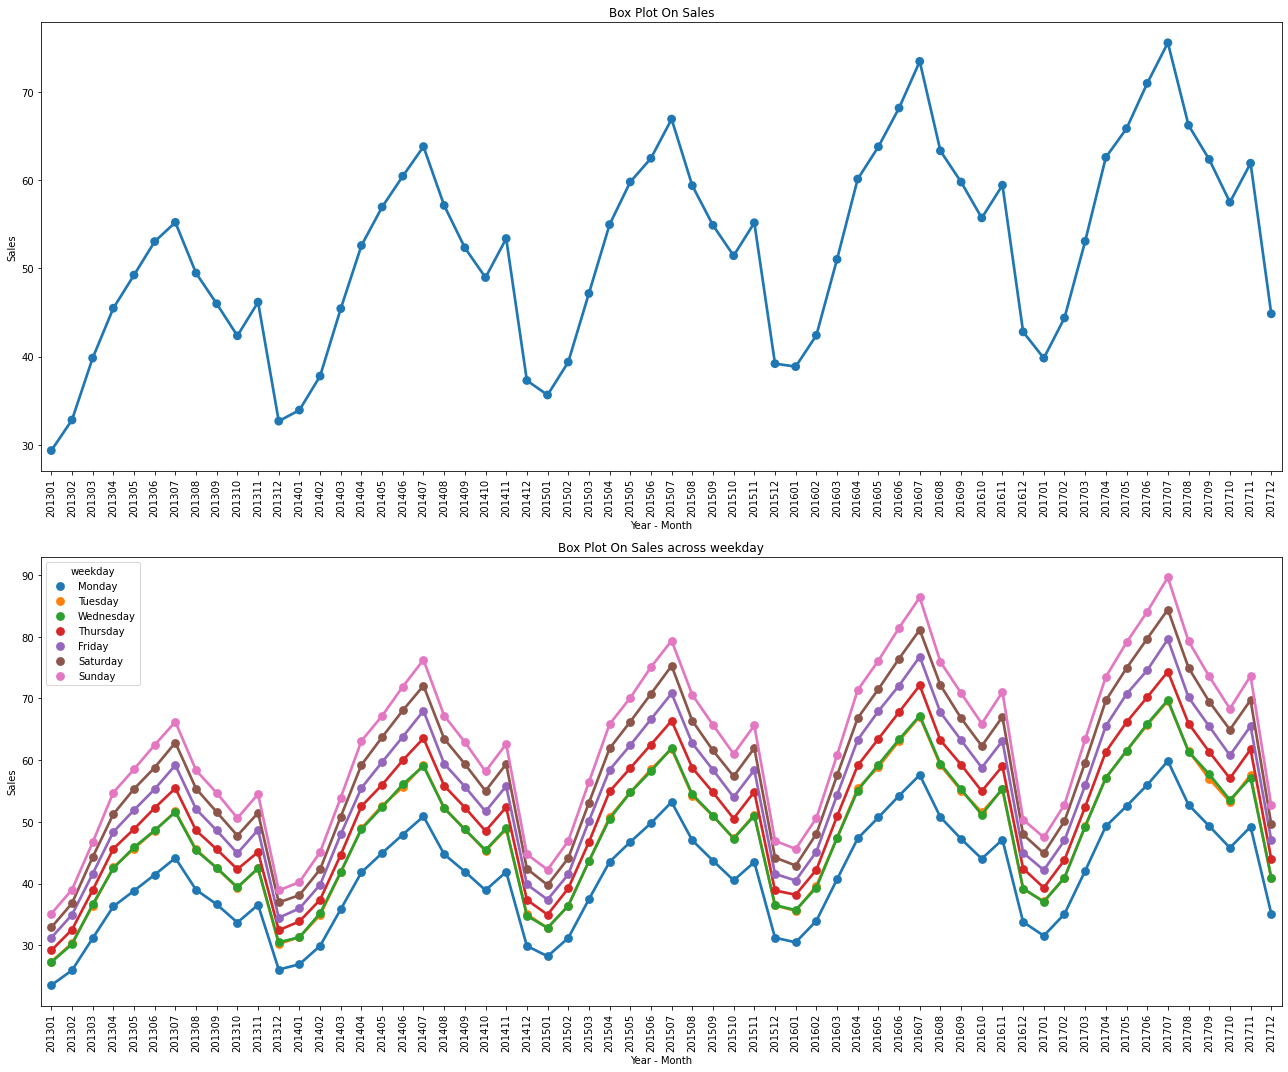

In [117]:
data_for_viz['year-month'] = data_for_viz['year'] * 100 + data_for_viz['month']
data_for_viz['year-month'] = data_for_viz['year-month'].astype('object')

fig, (ax1,ax2) = plt.subplots(nrows = 2)
fig.set_size_inches(18,15)


groupby_data = pd.DataFrame(data_for_viz.groupby(['year-month'])["sales"].mean()).reset_index()

sn.pointplot(x=groupby_data['year-month'],
           y=groupby_data['sales'],
           ax = ax1)
ax1.set(xlabel = 'Year - Month',ylabel='Sales', title="Box Plot On Sales")
#plt.xticks(rotation=90)
ax1.set_xticklabels(labels = groupby_data['year-month'],rotation=90)

groupby_data = pd.DataFrame(data_for_viz.groupby(['year-month','weekday'])["sales"].mean()).reset_index()

sn.pointplot(x=groupby_data['year-month'],
           y=groupby_data['sales'],
           hue = groupby_data['weekday'],
           hue_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'],
           ax = ax2)
ax2.set(xlabel = 'Year - Month',ylabel='Sales', title="Box Plot On Sales across weekday")
plt.xticks(rotation=90)

plt.tight_layout() # https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots

plt.show()# 结尾加上该行代码，否则会出现text和array

## 2.2 EDA Findings on cross analysis

### 存在 Seasonality & Trend

### 除周二周三较相近，周一到周日呈上升趋势

# III. Demand Forecasting

## 3.1 Prophet by Facebook
https://facebook.github.io/prophet/docs/quick_start.html#python-api

脸书开源项目，直接输入时间 & 销量两个字段，即可预测，其中时间字段可以是date也可以是timestamp。

由于本数据集存在10家店铺、50个单品，总计50 * 10 = 500个组合，故先以一个店铺作为pilot。

若在单个店铺可行，可以有500个prophet模型以分析全部组合，前提是每个组合的销量数据都足够丰富，时间跨度够长，数据缺失较少。

In [133]:
data_sample = data[(data['is_train'] == 1) & (data['store'] == 1) & (data['item'] == 1)].reset_index(drop = True)
data_sample = data_sample[['date','sales']]
data_sample = data_sample.rename(columns = {'date':'ds', 'sales':'y'})
data_sample.tail()

,ds,y
1821,2017-12-27,14
1822,2017-12-28,19
1823,2017-12-29,15
1824,2017-12-30,27
1825,2017-12-31,23


In [137]:
from sklearn.model_selection import train_test_split

train_sample, test_sample = train_test_split(data_sample, test_size=0.2, random_state = 19960127)

In [140]:
len(train_sample)

1460

In [139]:
len(test_sample)

366

In [138]:
m = Prophet()
m.fit(train_sample)

16:11:52 - cmdstanpy - INFO - Chain [1] start processing
16:11:53 - cmdstanpy - INFO - Chain [1] done processing


In [143]:
future = m.make_future_dataframe(periods=len(test_sample))
future.tail()

,ds
1821,2018-12-27
1822,2018-12-28
1823,2018-12-29
1824,2018-12-30
1825,2018-12-31


In [144]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,2018-12-27,17.500186,12.117740,23.538356
1822,2018-12-28,19.058970,13.406179,24.967641
1823,2018-12-29,21.082320,15.204105,26.830642
1824,2018-12-30,22.128609,16.423322,27.873683
1825,2018-12-31,13.853844,8.214337,19.911814


In [149]:
len()

366

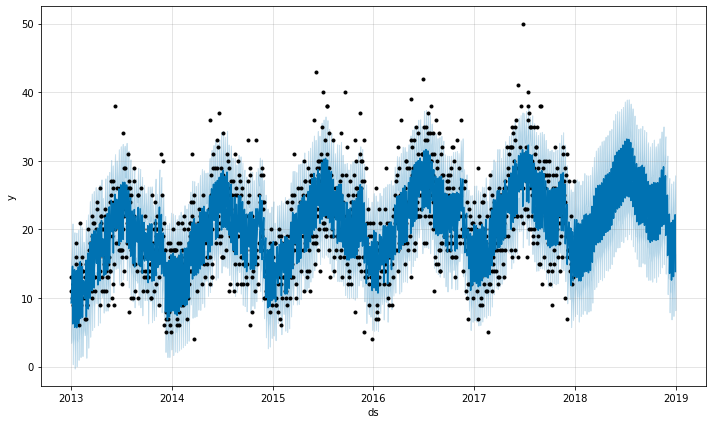

In [153]:
fig1 = m.plot(forecast)

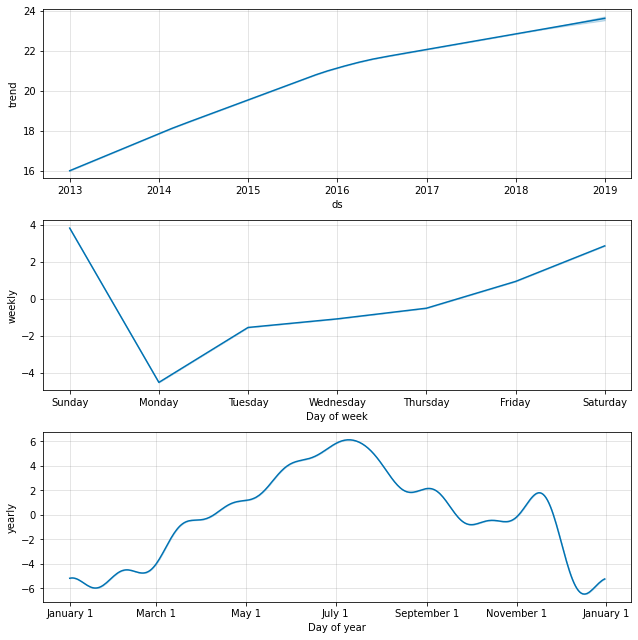

In [154]:
fig2 = m.plot_components(forecast)

In [155]:
def smape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast))*100)

pred = forecast[len(train_sample):]['yhat']
real = test_sample['y']
smape(real,pred)

4.876236601392621

### 使用Prophet预测所有store + item

In [178]:
test_output = test[['date','store','item']].reset_index(drop = True).reset_index(drop = False)
test_output = test_output.rename(columns = {'index':'id'})
#test_output['sales'] = 0
test_output.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [188]:
len(test_output)

45000

### Note: Run the following cell would take around 20mins

In [197]:
import logging, sys
logging.disable(sys.maxsize) # prevent prophet from echoing 
# https://stackoverflow.com/questions/29651505/disable-info-logging-messages-in-ipython-notebook

#logging.disable(logging.NOTSET) # enable logging (reverse of the above setting) 
# https://discuss.dizzycoding.com/how-to-disable-logging-on-the-standard-error-stream-in-python/


predicted_sales_list = []
#for item_code in range(1,3):
#    for store_code in range(1, 3):
for item_code in range(1, data.item.nunique() + 1):
    for store_code in range(1, data.store.nunique() + 1):
        train_current = data[(data['store'] == store_code) & (data['item'] == item_code)].reset_index(drop = True)
        train_current = train_current[['date','sales']].rename(columns = {'date':'ds', 'sales':'y'})
        to_be_predict = test_output[(test_output['store'] == store_code) & (test_output['item'] == item_code)].reset_index(drop = True)

        m = Prophet()
        m.fit(train_current)

        future = m.make_future_dataframe(periods=len(to_be_predict))
        forecast = m.predict(future)
        predicted_sales_list = predicted_sales_list + list(forecast['yhat'][len(train_current):])
        

In [198]:
len(predicted_sales_list)

45000

In [199]:
output = test_output.copy()[['id']]
output['sales'] = predicted_sales_list
output.tail()

,id,sales
44995,44995,31.594207
44996,44996,40.065306
44997,44997,41.008757
44998,44998,45.432115
44999,44999,49.882036


In [201]:
output.to_csv('store_item_forecast_prophet.csv',index = False)

## 3.2 Time Series Models
AR MA ARMA ARIMA 0831